In [204]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set the display 
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',None)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [205]:
#reading data from local
app_data=pd.read_csv("application_data.csv")
prev_data = pd.read_csv("previous_application.csv")

In [206]:
#determining the shape of the application dataset
app_data.shape

(307511, 122)

In [207]:
#determining the shape of the previous application dataset
prev_data.shape

(1670214, 37)

In [208]:
#checking the actual values in the application dataset
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [209]:
#checking the actual values in the previous application dataset
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


<span style='background:yellow'> From the analysis above, we can determine that the 2 dataframes are linked through SK_ID_CURR which would be used later when we want to merge the 2 dataframes.</span>

# Identification of variables and datatypes


### Data types

In [210]:
# Checking the applications table and column info
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [211]:
#Checking the preious application table info
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### <span style='color:green'> Let us now consider each dataframe separately and look at their individual columns first. 
</span>

## <span style='background:yellow'>APPLICATION DATASET </span>

## Data Cleaning

In [212]:
#Making a copy of the initial dataframe to perform data cleaning
curr_inp = app_data.copy()

In [213]:
#Checking shape of copied dataset
curr_inp.shape

(307511, 122)

##### Checking Data Imbalance in TARGET variable

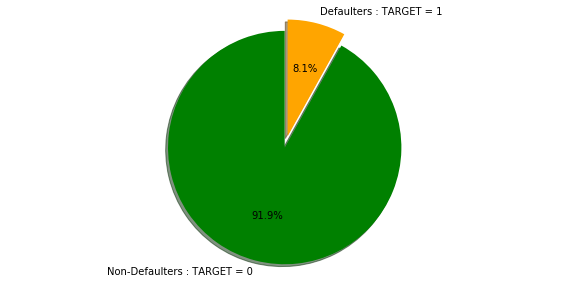

In [214]:
#TARGET variable imbalance check

ya =  curr_inp.TARGET.value_counts().to_frame().reset_index()
ya.rename(columns={'index':'TARGET','TARGET':'Count_of_TARGET'},inplace=True)

lbls = ['Non-Defaulters : TARGET = 0' , 'Defaulters : TARGET = 1']
# "explode" the 2nd slice
pop_share =  ya.Count_of_TARGET
explode = (0, 0.1)
clr = ['Green','Orange']
plt.figure(figsize=[8,4])
plt.pie( pop_share, explode=explode, colors= clr , labels=lbls, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')  
plt.tight_layout()
plt.show()

###### <span style='background:yellow'> The data is imbalanced with TARGET = 0 being a lot more than TARGET = 1 implying that most of the data we have is for customers who are not defaulters. </span>

##### <span style='color:green'>Finding the missing values and and analysing the ways to fix the rows and columns</span>

In [215]:
#checking the number of null values in the columns of the dataframe
curr_inp.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

<span style='background:yellow'> <span style= 'color:blue'> **We notice that there are quite a few columns which have very high number of null values in them.
Let's analyze the % missing and drop the columns where % missing is high because imputation will not make sense for such high missing data.**</span>

In [216]:
#finding the missing value percentage in the columns of the dataframe 
null_per=(curr_inp.isnull().sum()/len(curr_inp))*100
null_per

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [217]:
#Defining a function to visualize the missing data

def misses(x):
    nulls = ((x.isnull().sum()/len(x))*100).sort_values(ascending=False)
    per_miss = nulls.to_frame().reset_index()
    per_miss.rename(columns={'index':'Variables',0:'Missing_Percentage'},inplace=True)
    per_miss.sort_values("Missing_Percentage", ascending=False, inplace=True)
    to_plot = per_miss[per_miss.Missing_Percentage>0]
    plt.figure(figsize=[15,10])
    sns.barplot(data= to_plot, x = to_plot.Variables, y = to_plot.Missing_Percentage )
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


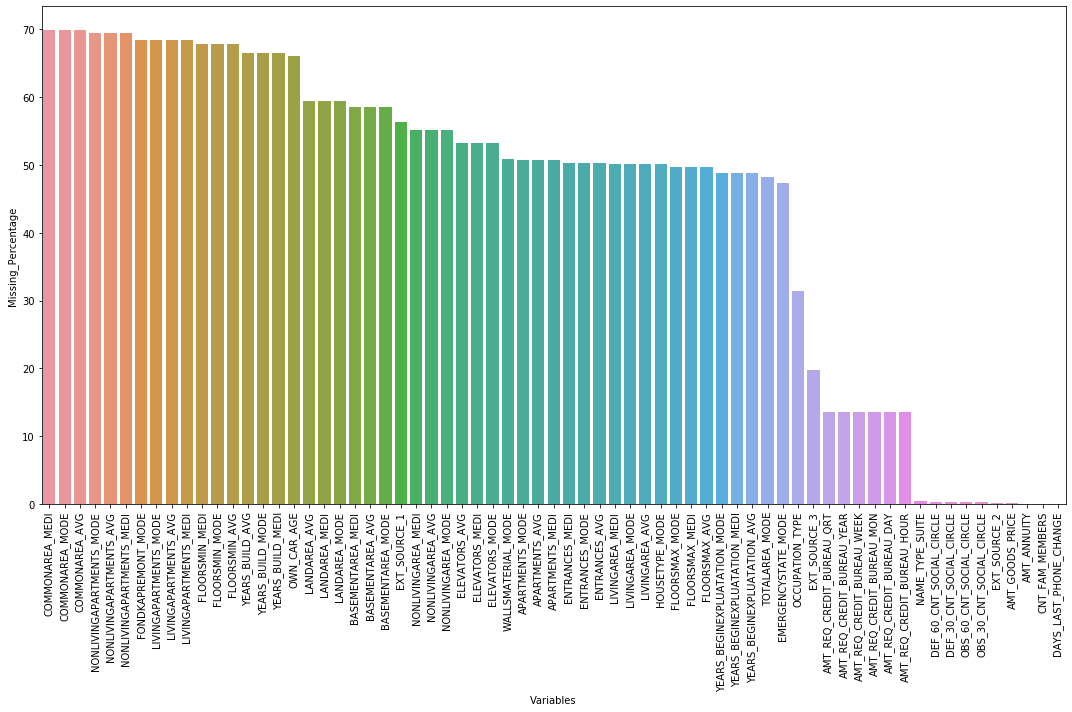

In [218]:
#visual analysis for missing data info on the entire dataset
misses(curr_inp)

##### Looking at the data, we can remove columns with more than 40% missing values in them

In [219]:
#finding the columns where the nulls are more than 40% of the total rows
null_cols_GT40=curr_inp.columns[null_per>40]
print(null_cols_GT40)
#how many such columns are there with high missing 
print(len(null_cols_GT40))

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

> <span style='background:yellow'> So there are basically 49 columns which have more than 40% data as null.
>> <span style='background:yellow'>Looking at these columns - they don't look important to our analysis, hence we can drop these columns from our intermediate dataset.
</span>

In [220]:
#Dropping columns where missing > 40% 
curr_inp=curr_inp.drop(null_cols_GT40, axis=1)

In [221]:
#checking the shape of the dataframe after droping the missing values columns(>40%)
curr_inp.shape

(307511, 73)

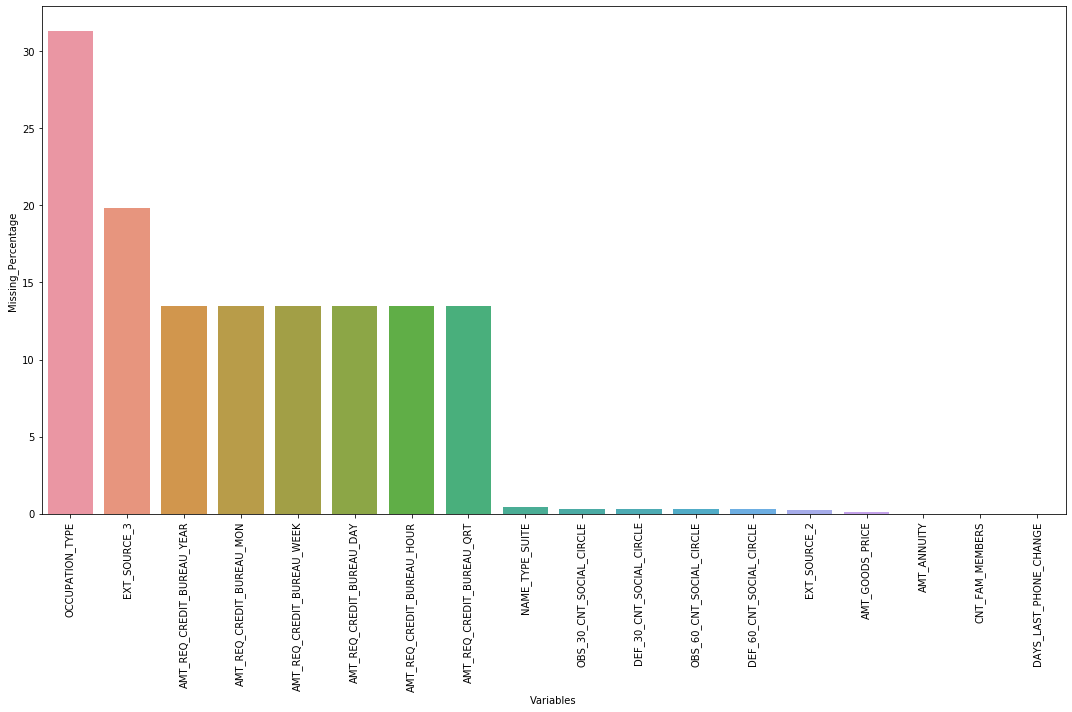

In [222]:
#checking the missing values after dropping few columns above 40%
misses(curr_inp)

<span style='background: yellow'> We notice that even after removing >40% of missing data columns, we do have some remaining columns which have considerable percentage of missing value.
Let's have look at these columns</span>


In [223]:
#Checking the percentage of remaining  null values 
remain_null=(curr_inp.isnull().sum()/len(curr_inp))*100
remain_null

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [224]:
#checking the null values above 13%
min_null=curr_inp.columns[remain_null>13]
len(min_null)

8

In [225]:
#check the columns above 13% of null values 
min_null

Index(['OCCUPATION_TYPE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

<span style='background: yellow'>Now we can start analyzing these columns to find the strategy to impute data into them
    </span>
    

### Analyzing the columns with high % of missing values

In [226]:
# Checking the datatypes
curr_inp[min_null].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OCCUPATION_TYPE             211120 non-null  object 
 1   EXT_SOURCE_3                246546 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  float64
 6   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  float64
 7   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
dtypes: float64(7), object(1)
memory usage: 18.8+ MB


##### <span style='background:yellow'>Handling the missing values:</span>

So in the above case where there is still high percentage of missing values, let's follow the below:
>> 1. Categorize them into numeric / categorical variable
>> 2. Determine which method is the best for imputation for these columns


In [227]:
#Finding unique values to help us determine if the columns are categorical or not
curr_inp[min_null].nunique()

OCCUPATION_TYPE                18
EXT_SOURCE_3                  814
AMT_REQ_CREDIT_BUREAU_HOUR      5
AMT_REQ_CREDIT_BUREAU_DAY       9
AMT_REQ_CREDIT_BUREAU_WEEK      9
AMT_REQ_CREDIT_BUREAU_MON      24
AMT_REQ_CREDIT_BUREAU_QRT      11
AMT_REQ_CREDIT_BUREAU_YEAR     25
dtype: int64

##### Since, the nunique doesn't give a clear picture, judging by the data and the description of the columns, we can divide them up as:

<span style='background: yellow'> Numerical: (all are dtype: float64) </span>
1. EXT_SOURCE_3                  
2. AMT_REQ_CREDIT_BUREAU_HOUR       
3. AMT_REQ_CREDIT_BUREAU_DAY       
4. AMT_REQ_CREDIT_BUREAU_WEEK     
5. AMT_REQ_CREDIT_BUREAU_MON     
6. AMT_REQ_CREDIT_BUREAU_QRT     
7. AMT_REQ_CREDIT_BUREAU_YEAR     


<span style='background: yellow'> Categorical: (dtype: Object) </span>
1. OCCUPATION_TYPE                

##### Determining the best method of imputation

In [228]:
#describing the data
curr_inp.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [229]:
#describing the data
curr_inp.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [230]:
#describing the data 
curr_inp.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [231]:
#describing the data
curr_inp.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [232]:
#describing the data
curr_inp.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [233]:
#describing the data
curr_inp.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [234]:
#describing the data
curr_inp.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

#### <span style='background: yellow'> From the above analysis, we can impute the missing values in the above 7 columns with help of   <span style='color: Blue'> **MEAN** </span>

In [235]:
# Checking the categorical variable
curr_inp.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [236]:
# checking mode on categorical variable
curr_inp.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

In [237]:
# checking median for Income Total variable with filter on mode of  occupation type 
(curr_inp[curr_inp.OCCUPATION_TYPE == 'Laborers'].AMT_INCOME_TOTAL).median()

157500.0

In [238]:
#checking median for Income Total variable with missing values of occupation type 
(curr_inp[curr_inp.OCCUPATION_TYPE.isna() == True].AMT_INCOME_TOTAL).median()

135000.0

##### <span style='background:yellow'>From the above we notice the below:
    1. The MODE for the column in Laborers.
    2. The median income for the missing rows in OCCUPATION_TYPE have similar values as the MODE for the variable - Laborers.
    
##### <span style='background:yellow'>  However, we would not replace the missing with MODE value as the count for Laborers currently is 55,186 ansd post replacing the NaN to Laborers the count would increase to 151,577.
Increasing the count so much (almost thrice) for one category does not make sense for analysis and will only result in skewed data.

    
###### <span style='background:yellow'> Hence, we can create a new category - "Unknown" for all these NaNs - this would help us visualize the missing data later on</span>

In [239]:
#describe the column occupation type
curr_inp["OCCUPATION_TYPE"].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [240]:
#replacing missing with Unknown
curr_inp["OCCUPATION_TYPE"] = curr_inp["OCCUPATION_TYPE"].fillna("Unknown")

In [241]:
#checking the count of occupation type data
curr_inp["OCCUPATION_TYPE"].value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [242]:
# Checking the missing data
curr_inp.OCCUPATION_TYPE.isna().sum()

0

##### Let's convert the days_birth into years to identify the customer age more accurately for our analysis

In [243]:
#Changing days of birth from negative to positive and also by converting the days to the actual age by 
#dividing the no. of days with 365
curr_inp['AGE_IN_YRS']=curr_inp.DAYS_BIRTH.abs()//365

#### Let's bin a few columns so that when we look at the ranges for these continous variables, it would make more sense for analysis

In [244]:
#define the bin for income
interval_range=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
Range=['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']
curr_inp['Range_of_income']=pd.cut(curr_inp['AMT_INCOME_TOTAL'],bins=interval_range,labels=Range)
print(curr_inp['Range_of_income'].value_counts())

125000-150000       47890
100000-125000       43701
200000-225000       40797
75000,100000        39806
150000-175000       34663
175000-200000       29644
50000-75000         19375
250000-275000       12733
225000-250000        7340
300000-325000        6752
350000-375000        4537
25000-50000          4517
275000-300000        4306
425000-450000        3113
500000 and above     2702
325000-350000        2122
400000-425000        1811
375000-400000        1265
475000-500000         312
450000-475000         125
0-25000                 0
Name: Range_of_income, dtype: int64


In [245]:
#define the bin for loan credit
bin_range = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
Range = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']
curr_inp['Range_of_credit']= pd.cut(curr_inp["AMT_CREDIT"],bins=bin_range,labels=Range)
print(curr_inp['Range_of_credit'].value_counts())

900000 and above    58912
250000-300000       31759
200000-250000       23054
500000-550000       22678
400000-450000       18239
0-150000            18159
150000-200000       17985
300000-350000       16205
650000-700000       15051
450000-500000       13799
750000-800000       12380
800000-850000       11559
550000-600000       11554
850000-900000       10233
350000-400000       10133
600000-650000        8998
700000-750000        6813
Name: Range_of_credit, dtype: int64


In [246]:
#define the bin for age 
age_range=[0,20,30,40,50,60,70]
label_age=['0-20','20-30','30-40','40-50','50-60','70 and above']
curr_inp['AGE_GROUP']= pd.cut(curr_inp['AGE_IN_YRS'],bins=age_range,labels=label_age)
print(curr_inp['AGE_GROUP'].value_counts())

30-40           83117
40-50           74401
50-60           67819
20-30           52805
70 and above    29368
0-20                1
Name: AGE_GROUP, dtype: int64


### Outliers Analysis

In [247]:
#defining a function to plot outliers
def outliers(x,y):
    plt.figure(figsize=[8,5])
    sns.boxplot(x[y])
    plt.ticklabel_format(style='plain', axis='x')
    plt.title("Analysing Outlier")
    plt.tight_layout()
    plt.show()

###### Checking outliers in a few variables

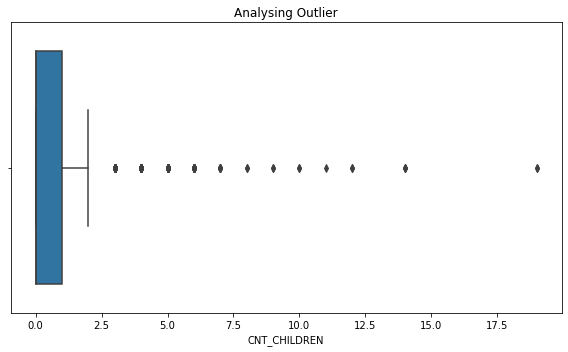

In [248]:
#checking the outliers
outliers(curr_inp,"CNT_CHILDREN")

##### Observation : <span style='background:yellow'> A count of children >=10 looks somewhat unusual. We can replace these high values with **MODE** as this is a discrete numerical variable.</span>

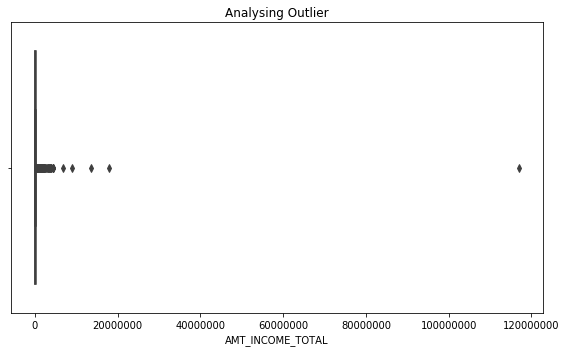

In [249]:
#checking the outliers
outliers(curr_inp,"AMT_INCOME_TOTAL")


##### Observation : <span style='background:yellow'> There is an income which is very far from the normal income bracket which causes skewness in data.
##### <span style='background:yellow'>We can replace this value by **MEDIAN** of the variable as this is a continuous numerical variable.</span>

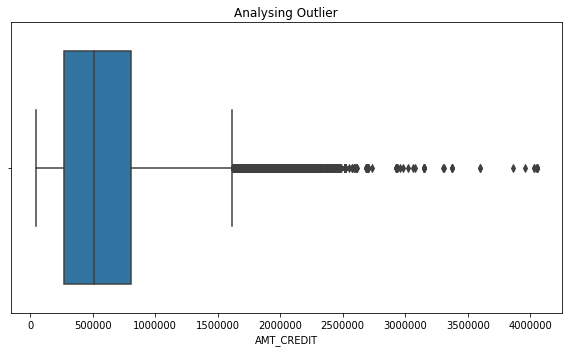

In [250]:
#checking the outliers
outliers(curr_inp,"AMT_CREDIT")

##### Observation : <span style='background:yellow'> The usual loan credited is below 3,500,00. Records above the normal range (>=3,500,000) can be replaced can be replaced by **MEDIAN** as this is a continuous numerical variable.

##### <span style='background:yellow'>This would help us remove the very high values which are less in frequency and could cause skewness in analysis. </span>


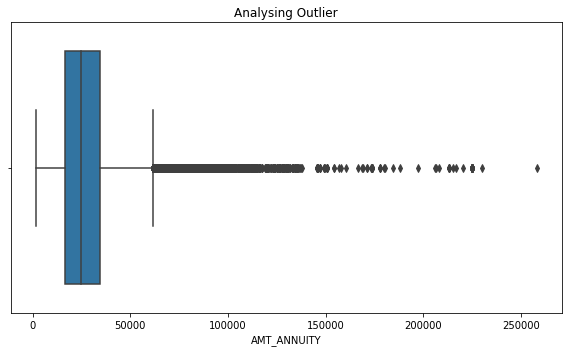

In [251]:
#checking the outliers
outliers(curr_inp,"AMT_ANNUITY")

##### Observation : <span style='background:yellow'> Some records which show high loan annuity (>=200,000) look suspicious as they don't fall under the normal range.
##### <span style='background:yellow'>    These very high values which are less in frequency and could cause skewness in analysis can be replaced by **MEDIAN** as this is a continuous numerical variable. </span>

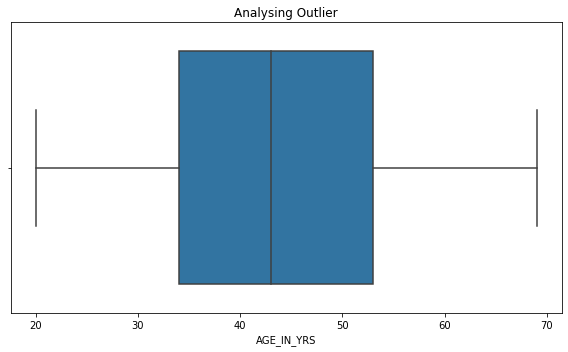

In [252]:
#checking the outliers
outliers(curr_inp,"AGE_IN_YRS")

##### Observation : <span style='background:yellow'> Age data looks evenly distributed. We do not need to do any cleaning for this column </span>

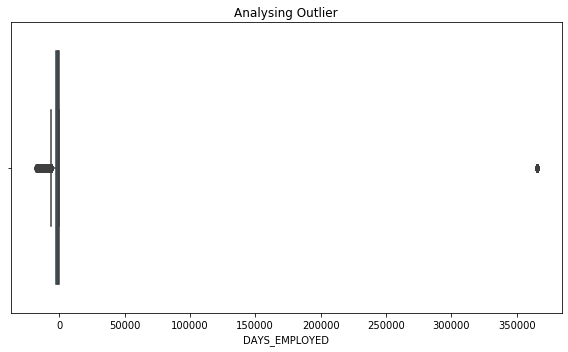

In [253]:
#checking the outliers
outliers(curr_inp,"DAYS_EMPLOYED")

##### Observation : <span style='background:yellow'> There is one outlier which looks incorrect. We should replace it with  **MODE** as this is a discrete numerical variable</span>

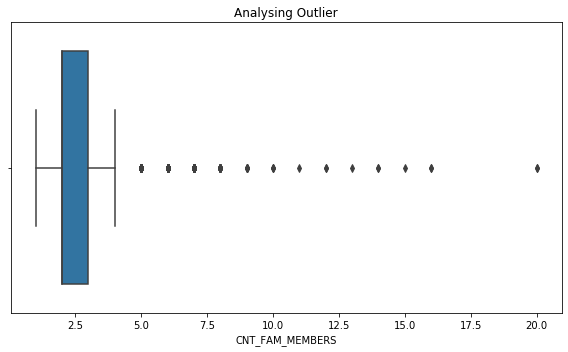

In [254]:
#checking the outliers
outliers(curr_inp,"CNT_FAM_MEMBERS")


##### Observation : <span style='background:yellow'> There are a few records which large number of family members; however, we should treat these as it could be because of joint family. </span>

***

##  ANALYSIS ON APPLICATION DATASET

### Splitting Application based on TARGET variable (0 and 1)

In [255]:
#Splitting Application based on TARGET variable (0 and 1)
app_0 = curr_inp[curr_inp.TARGET == 0]
app_1 = curr_inp[curr_inp.TARGET == 1]

In [256]:
#Checking the shape
app_0.shape

(282686, 77)

In [257]:
#Checking the shape
app_1.shape

(24825, 77)

In [258]:
#defining a function for categorical variable analysis
def cat_plot(x):
    df0 = app_0[x].value_counts().to_frame().reset_index()
    df1 = app_1[x].value_counts().to_frame().reset_index()
    df0.rename(columns={'index':'Variable',x:'Count'},inplace=True)
    df1.rename(columns={'index':'Variable',x:'Count'},inplace=True)
    plt.figure(figsize=[15,8])
    
    #subplot for TARGET = 0
    plt.subplot(1,2,1)
    sns.barplot(data=df0, x= df0.Variable, y = df0.Count)
    plt.xlabel(x, fontsize =12)
    plt.ylabel("Count", fontsize =12)
    plt.xticks(rotation=90)
    plt.title("Distribution of %s" %x + " for Non-Defaulters")
    
    #subplot for TARGET = 1
    plt.subplot(1,2,2)
    sns.barplot(data=df1, x= df1.Variable, y = df1.Count)
    plt.xlabel(x, fontsize =12)
    plt.ylabel("Count", fontsize =12)
    plt.xticks(rotation=90)
    plt.title("Distribution of %s" %x + " for Defaulters")
    
    plt.tight_layout()
    plt.show()    

## Unordered Categorical Variables - Univariate

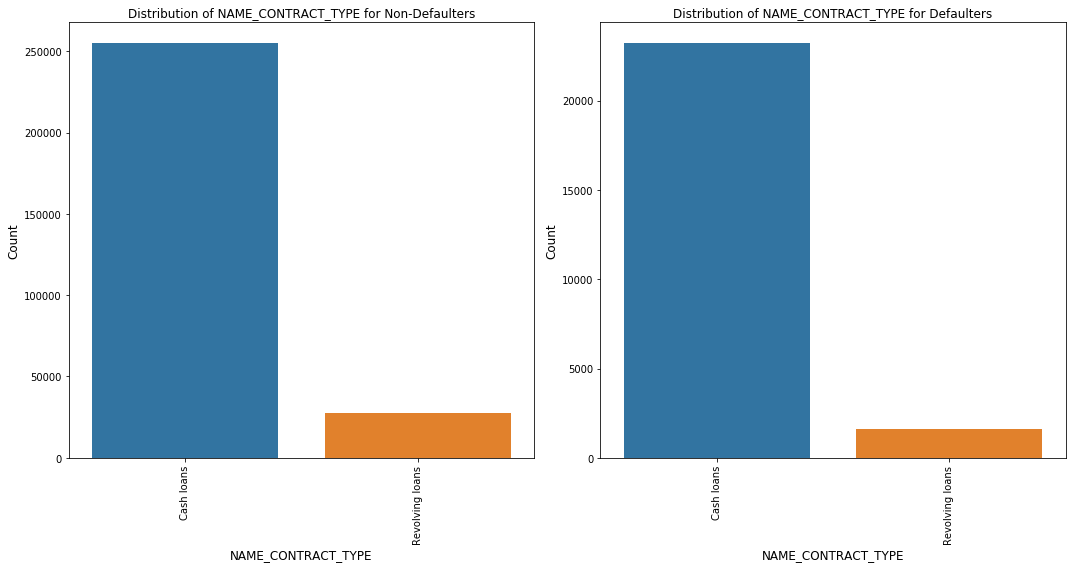

In [259]:
#plot the Loan Contract type
cat_plot("NAME_CONTRACT_TYPE")

<span style='background:yellow'> **We note that although there is not much difference when it comes to CASH LOANS between Defaulters and Non defaulters ; but Revolving loans are lesser for Defaulters - which means it is safer for the bank to give REVOLVING LOANS.**


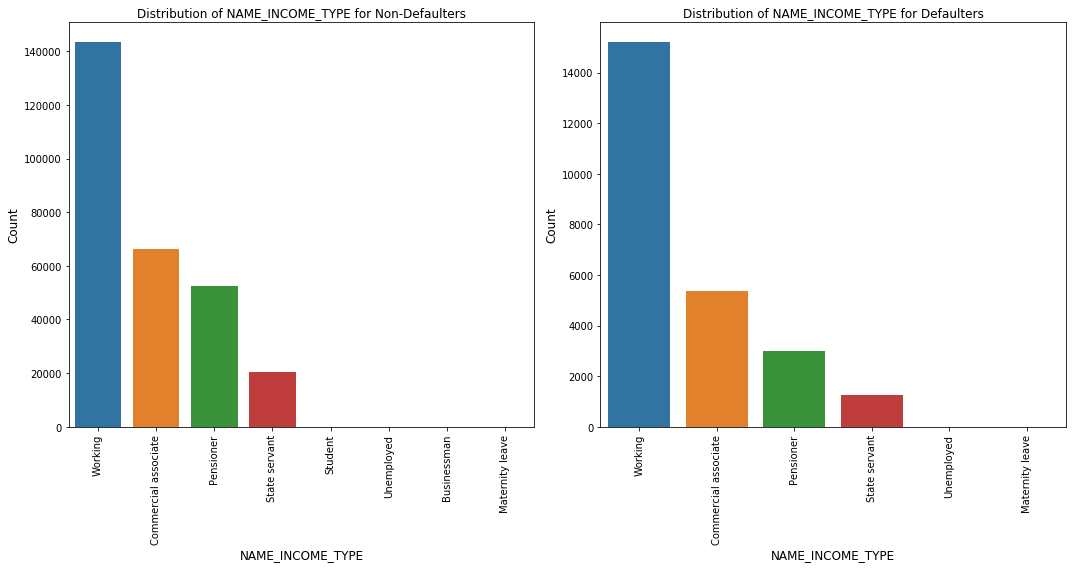

In [260]:
#plot the Client Income Type
cat_plot("NAME_INCOME_TYPE")

<span style='background:yellow'> **We note that the income type WORKING  have more defaulters. We also note that there are majorly 4 income type categories: Working, Commercial assosiate, Pensioner, State Servant - who are holding loans**

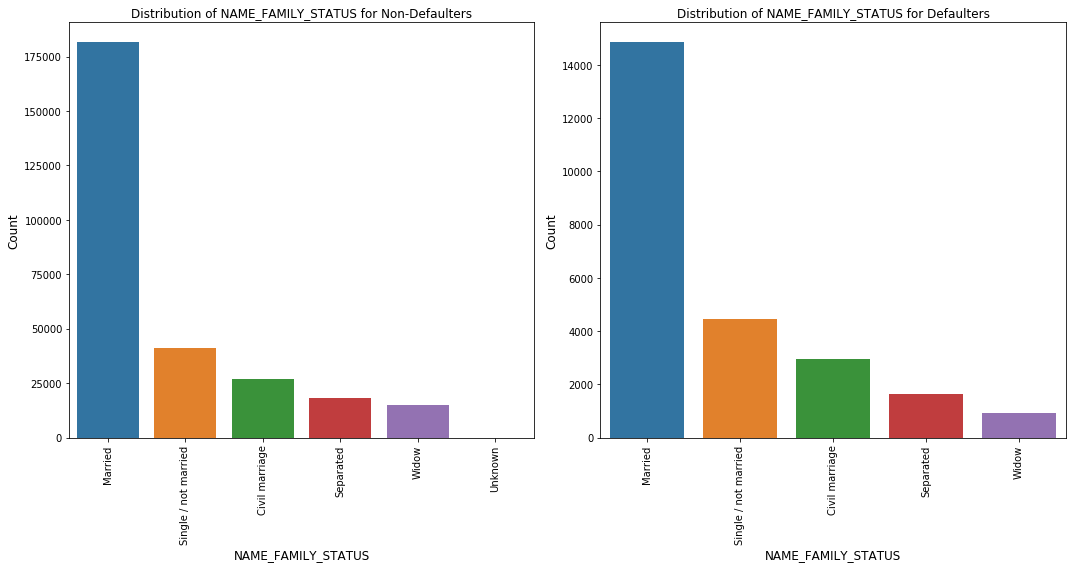

In [261]:
#plot the Family status Type
cat_plot("NAME_FAMILY_STATUS")

 <span style='background:yellow'> **Single/Not married population have a higher percentage in defaulter population than non defaulters suggesting that these customers default more on their loan payments. This could be a result of improper financial planning.**

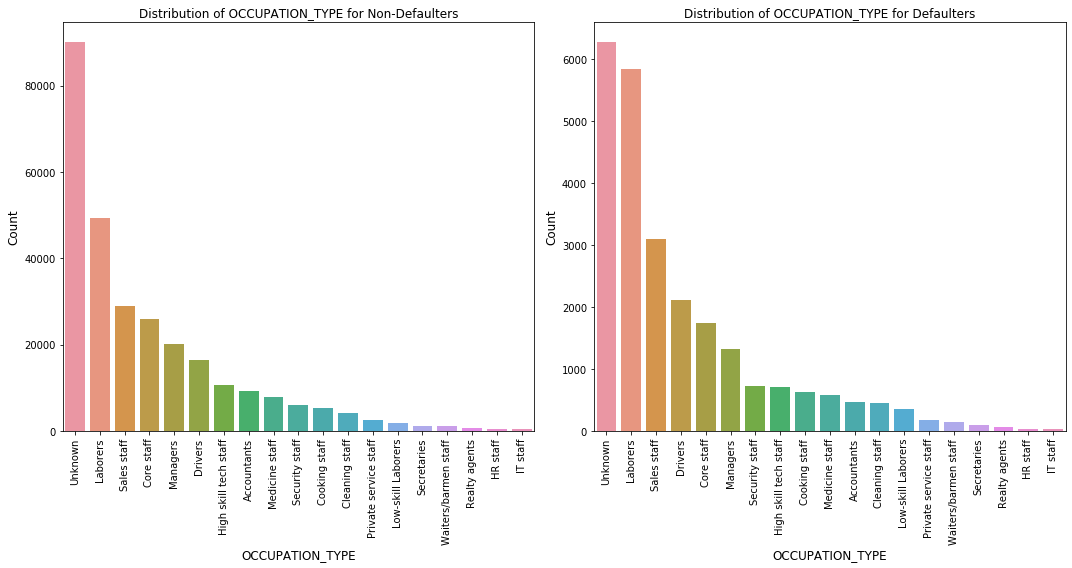

In [262]:
#plot the Client occupation Type
cat_plot("OCCUPATION_TYPE")

 <span style='background:yellow'> **There is very high proportion of defaulters from the Laborers Occupation type**

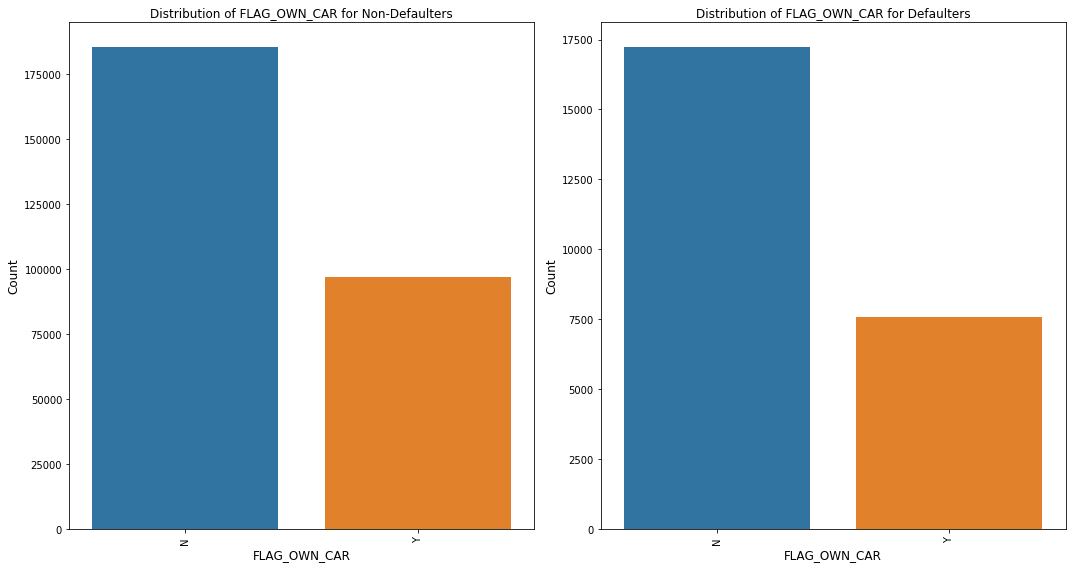

In [263]:
#plot the Flag for Car Ownership
cat_plot("FLAG_OWN_CAR")

 <span style='background:yellow'> **We note that in our base, almost half the customers do not own a car for both the categories. Also, if the customer owns a car, they are more likely to be a non-defaulter.**

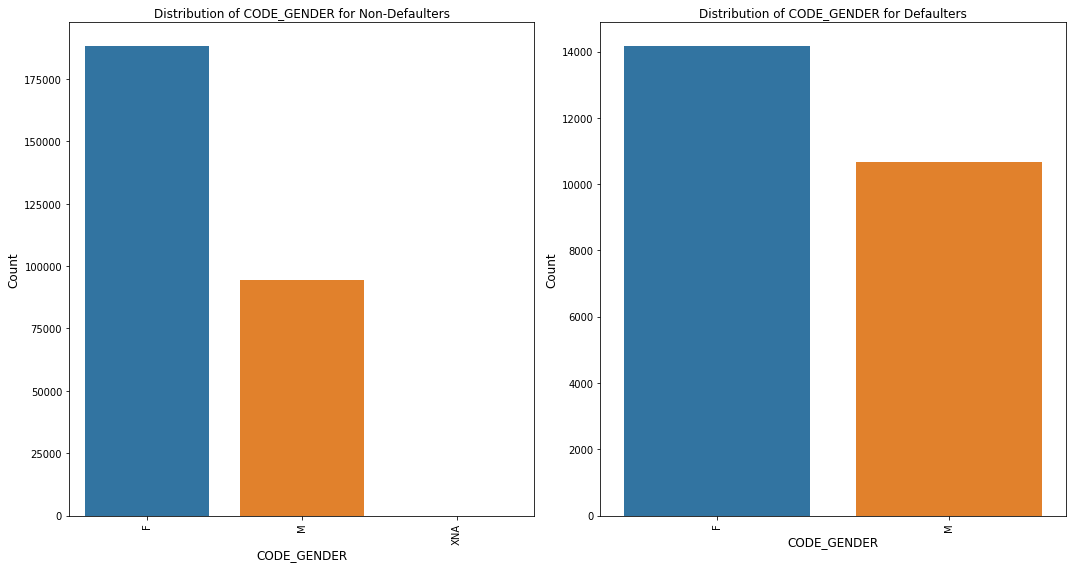

In [264]:
#plot the Flag for Car Ownership
cat_plot("CODE_GENDER")

 <span style='background:yellow'> **We note that in our base, Females are almost double the number of Male customers. Also, we see that the proportion of Males in Defaulters increase in comparison to Non defaulters indicating that Males are more likely to not pay their credit.**

## Ordered Categorical Variables - Univariate

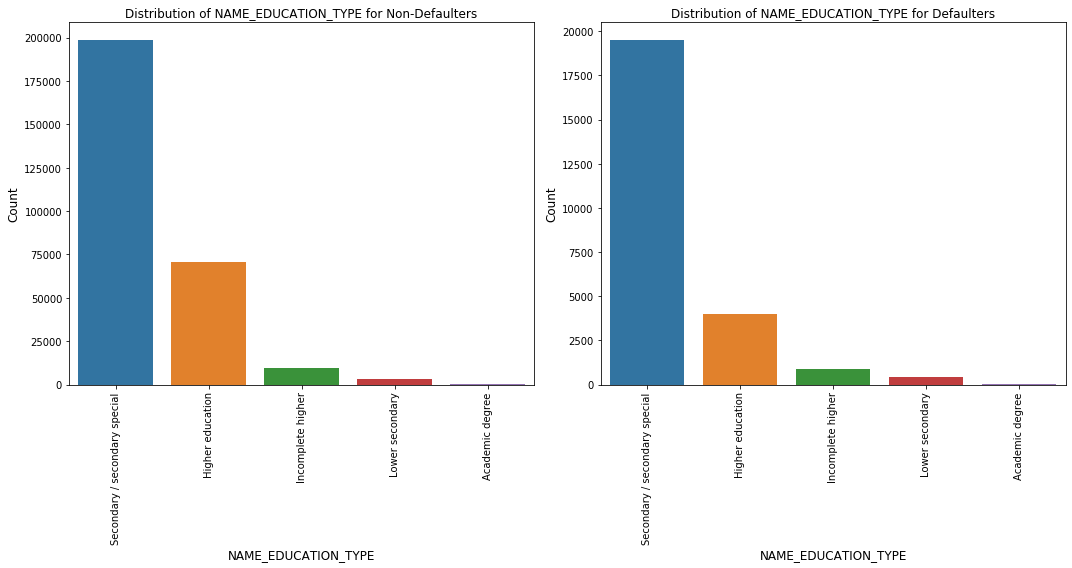

In [265]:
#plot the Education Type
cat_plot("NAME_EDUCATION_TYPE")

 <span style='background:yellow'> **We can note that Higher education, Secondary/Secondary special have higher proportions in Non defaulters - which can help us summarize that higher the education, lesser the default rate**

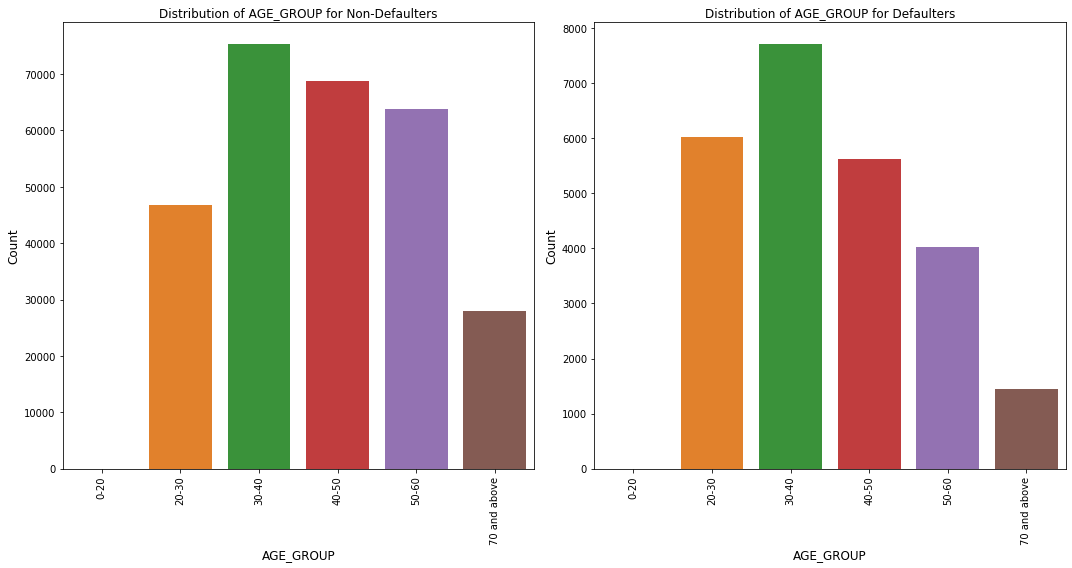

In [266]:
#plot the Age
cat_plot("AGE_GROUP")

 <span style='background:yellow'> **We can note that younger population range [20-30] have a higher proportion of defaults but the older population range from >40 have much lesser default rate vs non defaults.  So we can conclude that younger the population, the higher the chance of defaulting on the loan.**
    
<span style='background:yellow'> **This makes sense because higher age brackets generally do have more financial stability than lower age brackets and are able pay their debts.**

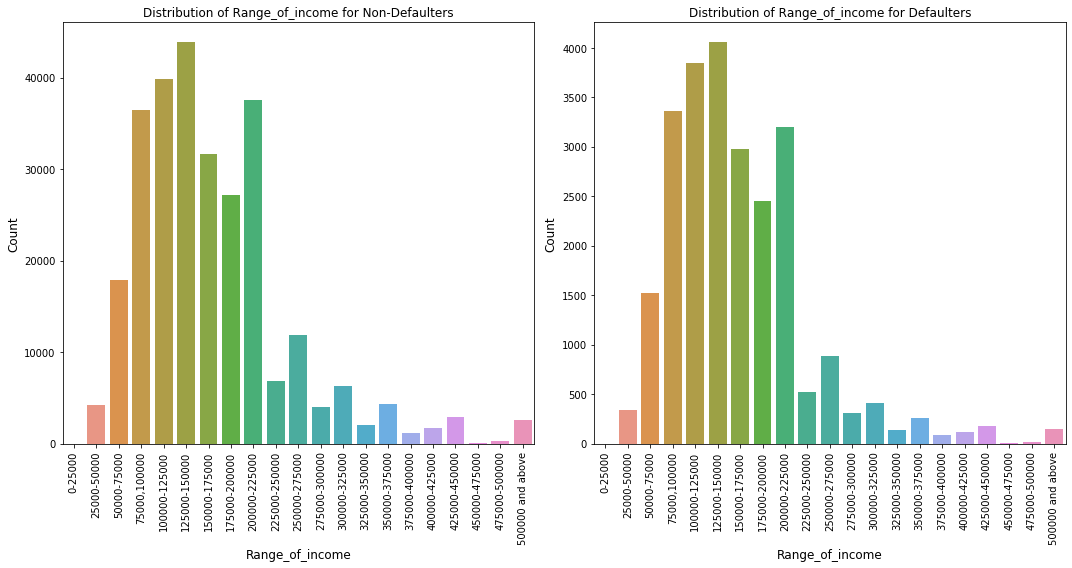

In [267]:
#plot the Income Range
cat_plot("Range_of_income")

In [268]:
#Checking the proportion for Range of income
print(curr_inp[curr_inp.TARGET==0].Range_of_income.value_counts(normalize=True).sort_values())
print("\n\n")
print(curr_inp[curr_inp.TARGET==1].Range_of_income.value_counts(normalize=True).sort_values())

0-25000             0.000000
450000-475000       0.000403
475000-500000       0.001047
375000-400000       0.004174
400000-425000       0.006000
325000-350000       0.007029
500000 and above    0.009042
425000-450000       0.010375
275000-300000       0.014150
25000-50000         0.014765
350000-375000       0.015148
300000-325000       0.022435
225000-250000       0.024104
250000-275000       0.041905
50000-75000         0.063141
175000-200000       0.096184
150000-175000       0.112085
75000,100000        0.128942
200000-225000       0.132992
100000-125000       0.141005
125000-150000       0.155073
Name: Range_of_income, dtype: float64



0-25000             0.000000
450000-475000       0.000443
475000-500000       0.000645
375000-400000       0.003424
400000-425000       0.004632
325000-350000       0.005438
500000 and above    0.005881
425000-450000       0.007251
350000-375000       0.010272
275000-300000       0.012326
25000-50000         0.013817
300000-325000       0.016516
22

 <span style='background:yellow'> **We can note from the plot and the proportion spread across income ranges that higher the income range, lesser is the proportion of defaulters. This makes business sense as customers with higher income bracket would have more capital flow to be able pay their loan debts.**

## Continuous Variables - Univariate

In [269]:
#defining a function for continuous variable analysis
def cont_plot(x):
    plt.figure(figsize=[15,8])
    
    #subplot for TARGET = 0
    plt.subplot(1,2,1)
    sns.distplot(app_0[x].dropna())
    plt.xlabel(x, fontsize=12)
    plt.ylabel("Probability density", fontsize=12)
    #plt.xticks(rotation=90)
    plt.title("Distribution of %s" %x + " for Non-Defaulters")
    
    #subplot for TARGET = 1
    plt.subplot(1,2,2)
    sns.distplot(app_1[x].dropna())
    plt.xlabel(x, fontsize=12)
    plt.ylabel("Probability density", fontsize=12)
    #plt.xticks(rotation=90)
    plt.title("Distribution of %s" %x + " for Defaulters")
    
    plt.tight_layout()
    plt.show()   

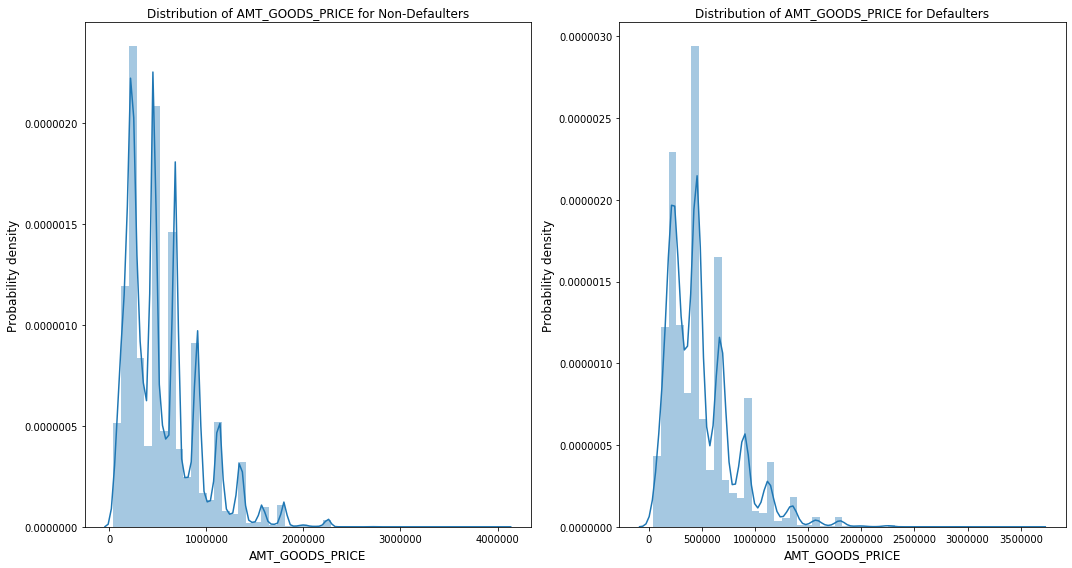

In [270]:
#plot for Goods Price
cont_plot('AMT_GOODS_PRICE')

 <span style='background:yellow'> **We can note from the plot that the defaults are generally more for goods priced between [0-500,000] , the higher goods price have lesser defaults.**

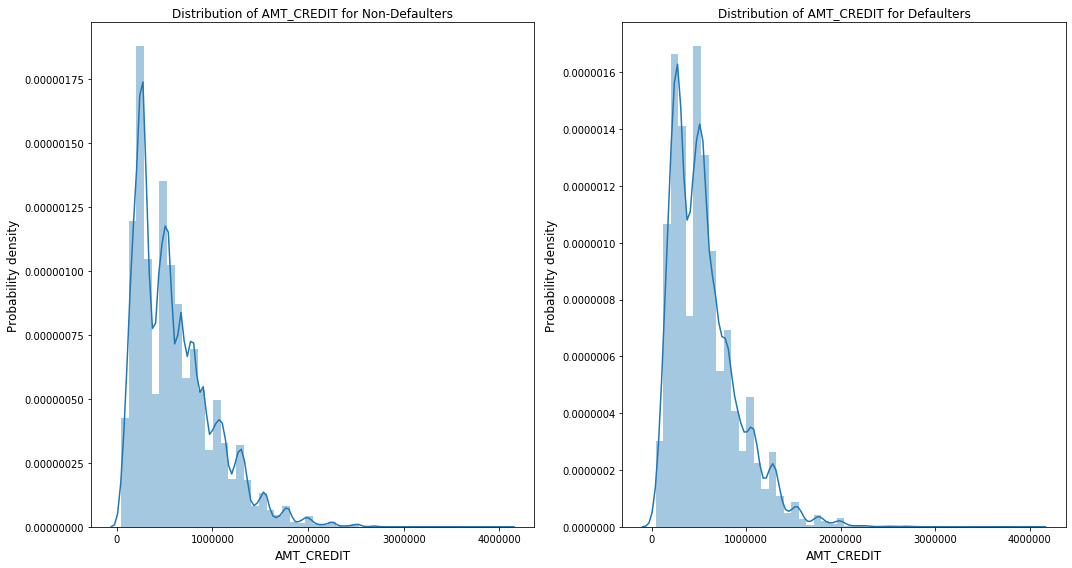

In [271]:
#plot for Amount credit
cont_plot('AMT_CREDIT')

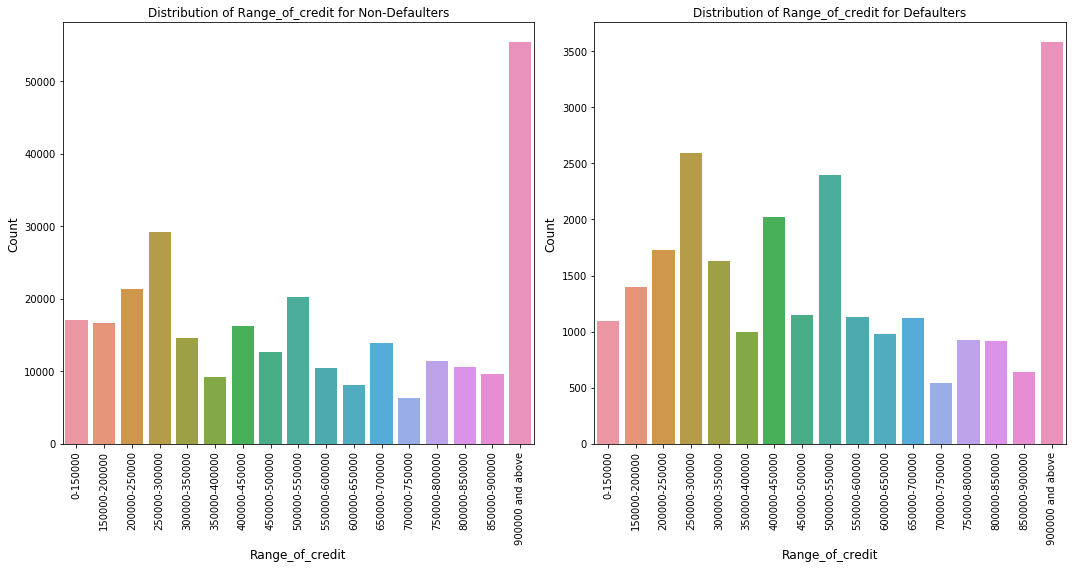

In [272]:
#Checking the plot for the binned variables of AMT_CREDIT
cat_plot('Range_of_credit')

 <span style='background:yellow'> **We note from both the plots above that the proportion  of defaulters is higher when the loan amount credited is between around 200,000 to 700,000 than the corresponding proportion for non-defaulters in the same range.**

## Checking the correlation between variables

In [273]:
#function to plot a heatmap for the correlation
def corr_plot(x):
    plt.figure(figsize=[15,10])
    sns.heatmap(cmap='Greens', data=x)
    plt.title("Correlation Analysis")
    plt.show()

In [274]:
#finding the correlation between variables
c0 = app_0.corr() #for TARGET = 0
c1 = app_1.corr() #for TARGET = 1

In [275]:
print("Correlation for TARGET = 0")
c0.unstack().drop_duplicates().sort_values(ascending=False).apply(lambda x: round(x,4))

Correlation for TARGET = 0


SK_ID_CURR                   SK_ID_CURR                     1.0000
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.9985
AMT_CREDIT                   AMT_GOODS_PRICE                0.9873
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.9501
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.8786
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.8619
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.8593
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.8304
AMT_ANNUITY                  AMT_GOODS_PRICE                0.7767
AMT_CREDIT                   AMT_ANNUITY                    0.7713
DAYS_BIRTH                   FLAG_EMP_PHONE                 0.6221
DAYS_EMPLOYED                AGE_IN_YRS                     0.6180
                             FLAG_DOCUMENT_6                0.5958
REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_WORK_REGION     0.4461
REG_CITY_NOT_LIVE_CITY       REG_CITY_NOT_WORK_CITY         0.

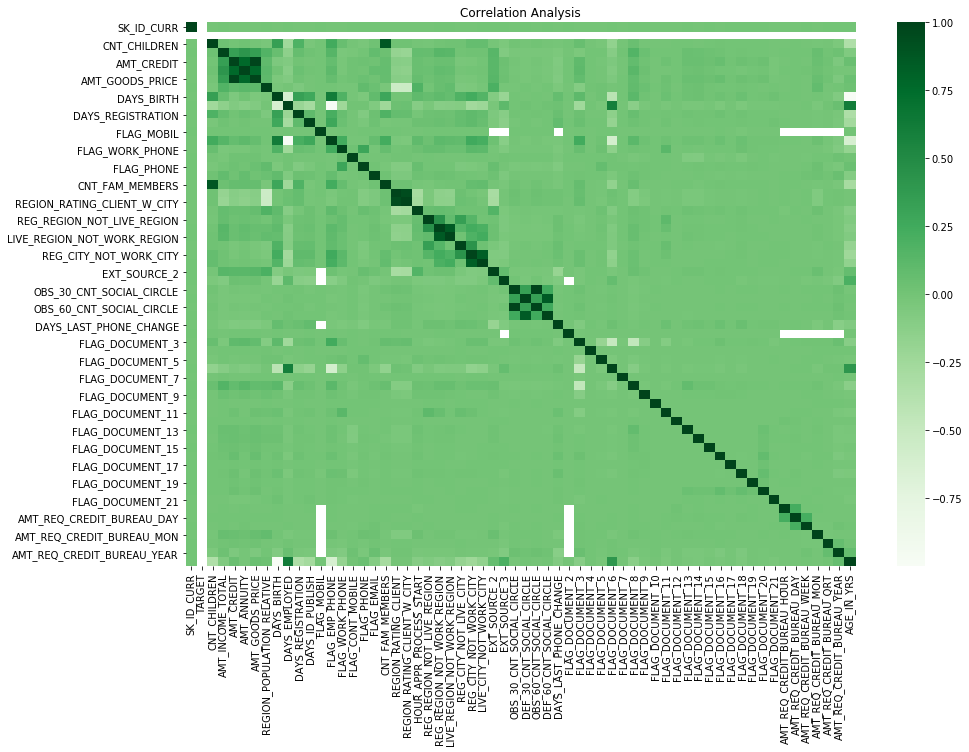

In [276]:
#checking the correlation in the dataset with target =0
corr_plot(c0)

<span style='background:yellow'> **We notice from the above that the following columns are highly correlated for TARGET = 0 :**
    1. OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.9985
    2. AMT_CREDIT                   AMT_GOODS_PRICE                0.9873
    3. REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.9501
    4. CNT_CHILDREN                 CNT_FAM_MEMBERS                0.8786
    5. REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.8619
    6. DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.8593
    7. REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.8304
    8. AMT_ANNUITY                  AMT_GOODS_PRICE                0.7767
    9. AMT_CREDIT                   AMT_ANNUITY                    0.7713
    10. DAYS_BIRTH                  FLAG_EMP_PHONE                 0.6221

**Some of these variables will later be used for bivariate analysis**

In [277]:
#ordering of highly correlated variables
print("Correlation for TARGET = 1")
c1.unstack().drop_duplicates().sort_values(ascending=False).apply(lambda x: round(x,4))

Correlation for TARGET = 1


SK_ID_CURR                   SK_ID_CURR                     1.0000
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.9983
AMT_CREDIT                   AMT_GOODS_PRICE                0.9831
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.9566
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.8855
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.8690
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.8479
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.7785
AMT_ANNUITY                  AMT_GOODS_PRICE                0.7527
AMT_CREDIT                   AMT_ANNUITY                    0.7522
DAYS_EMPLOYED                FLAG_DOCUMENT_6                0.6173
DAYS_BIRTH                   FLAG_EMP_PHONE                 0.5785
DAYS_EMPLOYED                AGE_IN_YRS                     0.5754
REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_WORK_REGION     0.4979
REG_CITY_NOT_LIVE_CITY       REG_CITY_NOT_WORK_CITY         0.

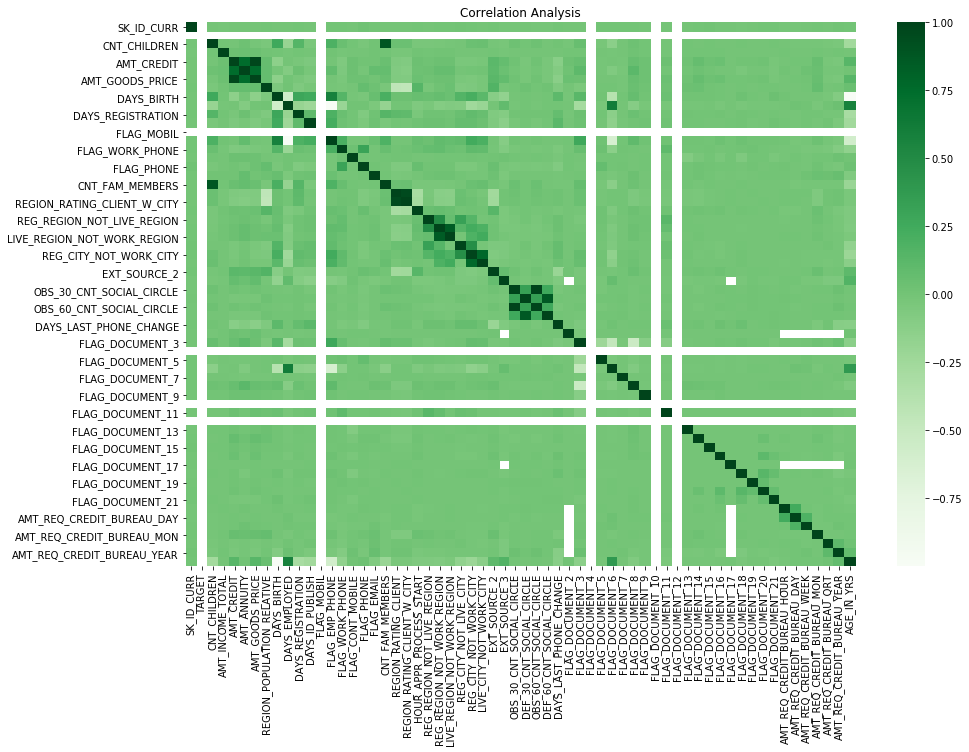

In [278]:
#checking the correlation in the dataset with target =1
corr_plot(c1)

<span style='background:yellow'> **We notice from the above that the following columns are highly correlated for TARGET = 1 :**
    1. OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.9983
    2. AMT_CREDIT                   AMT_GOODS_PRICE                0.9831
    3. REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.9566
    4. CNT_CHILDREN                 CNT_FAM_MEMBERS                0.8855
    5. DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.8690
    6. REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.8479
    7. REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.7785
    8. AMT_ANNUITY                  AMT_GOODS_PRICE                0.7527
    9. AMT_CREDIT                   AMT_ANNUITY                    0.7522
    10. DAYS_EMPLOYED               FLAG_DOCUMENT_6                0.6173

**Some of these variables will later be used for bivariate analysis**

## Bivariate Analysis

##### Let's do some bivariate analysis on some of the columns

In [279]:
#defining a function for bivariate plotting
def bivariate_plot(d1, d2, var1,var2):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    sns.scatterplot(x=var1,y=var2,data=d1)
    plt.title('Scatterplot for TARGET = 0')
    plt.xlabel(var1)
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.scatterplot(x=var1,y=var2,data=d2)
    plt.title('Scatterplot for TARGET = 1')
    plt.xlabel(var1)
    plt.xticks(rotation=90)
    plt.show()


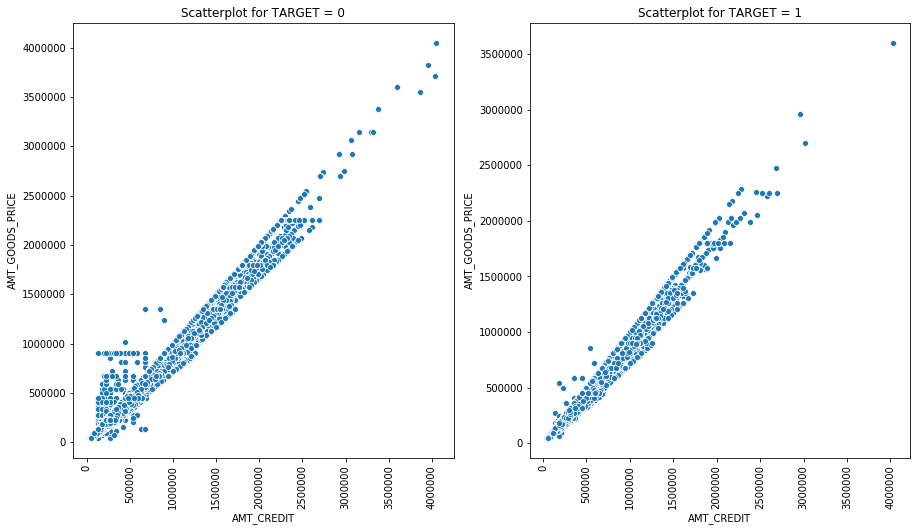

In [280]:
#AMT_GOODS_PRICE vs  AMT_CREDIT
bivariate_plot(app_0, app_1, "AMT_CREDIT","AMT_GOODS_PRICE")

<span style='background:yellow'> **As seen in the correlation matrix, the high positive correlation between the 2 varibales is seen in the graphs above for both TARGET variables.**
    
<span style='background:yellow'>  **We notice that for Goods Price and Loan Credit amount <=50,000 the defaulters are less. More customers are able to repay there loans on time when the loan is lesser than 50k**

##### Let's look at the previous applciation dataset now

## <span style='background:yellow'>PREVIOUS APPLICATION DATASET </span>

In [281]:
#Making a copy of the initial dataframe to perform data cleaning
prev_inp = prev_data.copy()

#Checking shape of copied dataset
prev_inp.shape

(1670214, 37)

In [282]:
#checking the number of null values in the columns of the dataframe
prev_inp.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

<span style='background:yellow'> <span style= 'color:blue'> We notice that there are quite a few columns which have very high number of null values in them.
Let's analyze the % missing and drop the columns where % missing is high because imputation will not make sense for such high missing data.</span>

In [283]:
#finding the missing value percentage in the columns of the dataframe 
miss_per=(prev_inp.isnull().sum()/len(prev_inp))*100
miss_per

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

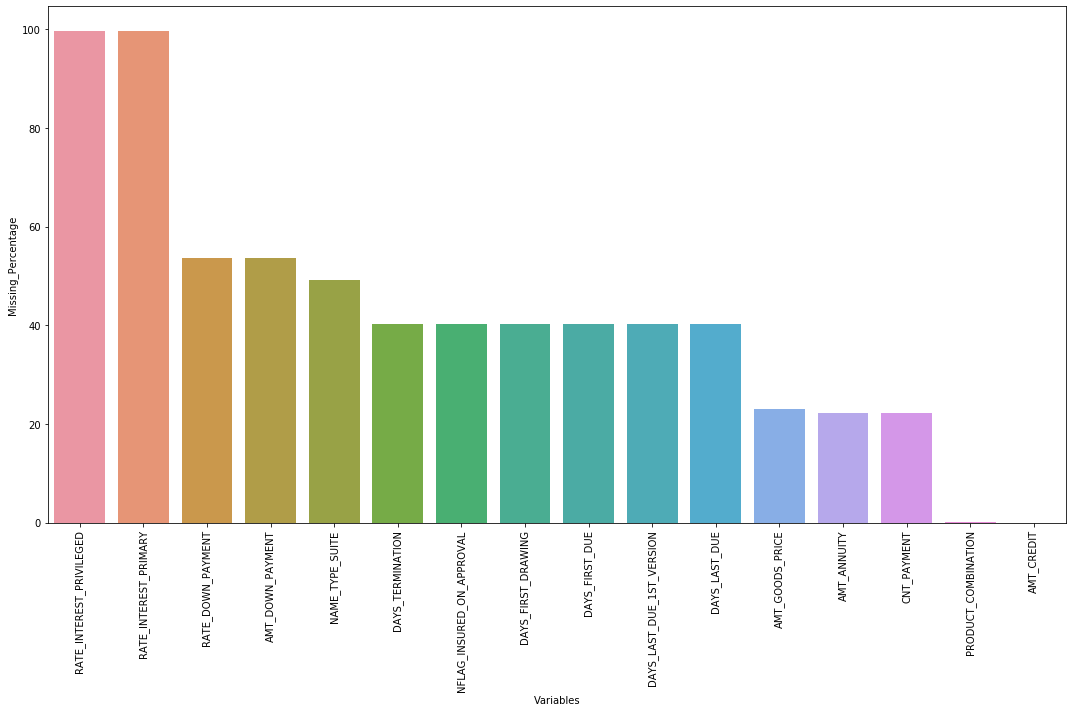

In [284]:
#visual analysis for missing data info on the entire dataset
misses(prev_inp)


##### Looking at the data, we can remove columns with more than 45% missing values in them

In [285]:
#finding the columns where the nulls are more than 45% of the total rows
null_cols_GT45=prev_inp.columns[miss_per>45]
print(null_cols_GT45)
#how many such columns are there with high missing 
print(len(null_cols_GT45))

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE'],
      dtype='object')
5


In [286]:
#Dropping columns where missing > 45% 
prev_inp=prev_inp.drop(null_cols_GT45, axis=1)

In [287]:
#checking the shape of the dataframe after droping the missing values columns(>45%)
prev_inp.shape

(1670214, 32)

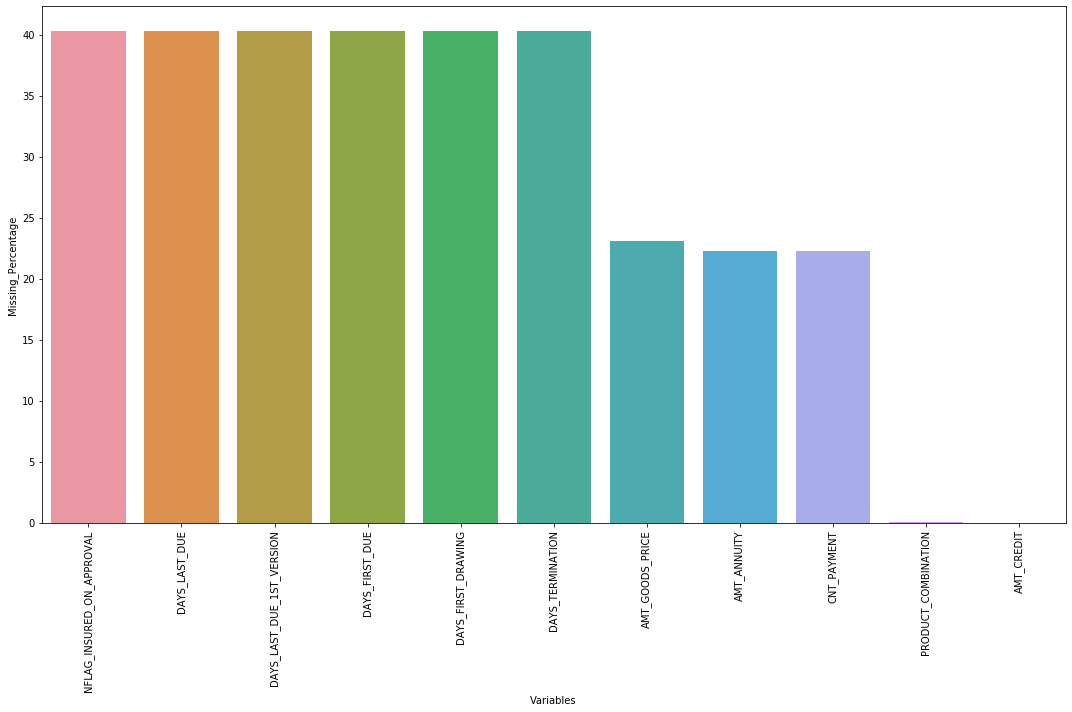

In [288]:
#checking the missing values after dropping few columns above 45%
misses(prev_inp)

<span style='background: yellow'> We notice that even after removing >45% of missing data columns, we do have some remaining columns which have considerable percentage of missing value.
Let's have look at these columns and decide if we should keep these or drop the columns</span>

In [289]:
remain_null=(prev_inp.isnull().sum()/len(prev_inp))*100
remain_null

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [290]:
#checking the null values above 20%
min_null=prev_inp.columns[remain_null>20]
print(len(min_null))


#check the columns above 20% of null values 
print(min_null)

9
Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')



##### <span style='background:yellow'>Handling the missing values:</span>

So in the above case where there is still high percentage of missing values, let's follow the below:
>> 1. Categorize them into numeric / categorical variable
>> 2. Understand if imputation is needed for the variable
>> 3. Determine which method is the best for imputation for these columns


In [291]:
#Finding unique values to help us determine if the columns are categorical or not
prev_inp[min_null].nunique()

AMT_ANNUITY                  357959
AMT_GOODS_PRICE               93885
CNT_PAYMENT                      49
DAYS_FIRST_DRAWING             2838
DAYS_FIRST_DUE                 2892
DAYS_LAST_DUE_1ST_VERSION      4605
DAYS_LAST_DUE                  2873
DAYS_TERMINATION               2830
NFLAG_INSURED_ON_APPROVAL         2
dtype: int64

##### Looking at the nunique and judging by the data and the description of the columns, we can divide them up as:

<span style='background: yellow'> Numerical: </span>
1. AMT_ANNUITY                  
2. AMT_GOODS_PRICE       
3. CNT_PAYMENT       
4. DAYS_FIRST_DRAWING  
5. DAYS_FIRST_DUE  
6. DAYS_LAST_DUE_1ST_VERSION  
7. DAYS_LAST_DUE
8. DAYS_TERMINATION   

<span style='background: yellow'> Categorical: </span>
1. NFLAG_INSURED_ON_APPROVAL            

In [292]:
# Checking the datatypes
prev_inp[min_null].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 9 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   AMT_ANNUITY                1297979 non-null  float64
 1   AMT_GOODS_PRICE            1284699 non-null  float64
 2   CNT_PAYMENT                1297984 non-null  float64
 3   DAYS_FIRST_DRAWING         997149 non-null   float64
 4   DAYS_FIRST_DUE             997149 non-null   float64
 5   DAYS_LAST_DUE_1ST_VERSION  997149 non-null   float64
 6   DAYS_LAST_DUE              997149 non-null   float64
 7   DAYS_TERMINATION           997149 non-null   float64
 8   NFLAG_INSURED_ON_APPROVAL  997149 non-null   float64
dtypes: float64(9)
memory usage: 114.7 MB


### ***Determing the best method of imputation***

In [293]:
prev_inp.AMT_ANNUITY.describe().apply(lambda x: format(x,'f'))

count    1297979.000000
mean       15955.120659
std        14782.137335
min            0.000000
25%         6321.780000
50%        11250.000000
75%        20658.420000
max       418058.145000
Name: AMT_ANNUITY, dtype: object

#### <span style='background: yellow'> From the above analysis, we can impute the missing values in the  column with help of   <span style='color: Blue'> **MEAN** </span>

In [294]:
prev_inp.AMT_GOODS_PRICE.describe().apply(lambda x: format(x,'f'))

count    1284699.000000
mean      227847.279283
std       315396.557937
min            0.000000
25%        50841.000000
50%       112320.000000
75%       234000.000000
max      6905160.000000
Name: AMT_GOODS_PRICE, dtype: object

#### <span style='background: yellow'> From the above analysis, we can impute the missing values in the  column with help of   <span style='color: Blue'> **MEAN** </span>

In [295]:
prev_inp.CNT_PAYMENT.describe().apply(lambda x: format(x,'f'))

count    1297984.000000
mean          16.054082
std           14.567288
min            0.000000
25%            6.000000
50%           12.000000
75%           24.000000
max           84.000000
Name: CNT_PAYMENT, dtype: object

#### <span style='background: yellow'> From the above analysis, we can impute the missing values in the  column with help of   <span style='color: Blue'> **MEAN** </span>

In [296]:
#descrbing the data
prev_inp.DAYS_FIRST_DRAWING.describe().apply(lambda x: format(x,'f'))

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: object

In [297]:
#Checking the days first drawing in years as days doesn't give a clear picture
prev_inp['YRS_FIRST_DRAWING'] = abs(prev_inp.DAYS_FIRST_DRAWING)//365

In [298]:
prev_inp.YRS_FIRST_DRAWING.describe().apply(lambda x: format(x,'f'))

count    997149.000000
mean        937.261177
std         242.194146
min           0.000000
25%        1000.000000
50%        1000.000000
75%        1000.000000
max        1000.000000
Name: YRS_FIRST_DRAWING, dtype: object

#### <span style='background: yellow'> From the above analysis, we see that the value in years do not make sense. Even a mean of 937 years is erroneous. We will drop this column from our analysis. </span>

In [299]:
prev_inp.DAYS_TERMINATION.describe().apply(lambda x: format(x,'f')) 

count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: object

In [300]:
#Checking the days till termination in years as days doesn't give a clear picture
prev_inp['YRS_TERMINATION'] = abs(prev_inp.DAYS_TERMINATION) //365

In [301]:
prev_inp.YRS_TERMINATION.describe().apply(lambda x: format(x,'f')) 

count    997149.000000
mean        228.262868
std         417.686681
min           0.000000
25%           1.000000
50%           3.000000
75%           6.000000
max        1000.000000
Name: YRS_TERMINATION, dtype: object

#### <span style='background: yellow'> From the above analysis, we see that the value in years do not make sense. Even a mean of 228 years looks erroneous. We will drop this column from our analysis. </span>

In [302]:
prev_inp.NFLAG_INSURED_ON_APPROVAL.value_counts(dropna=False)

NaN    673065
0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

#### <span style='background: yellow'> Since this column tells us whether an insurance was taken on the previous loan, missing data can be replaced by another category called <span style='color: blue'> "Unknown"  </span>

## Outlier analysis

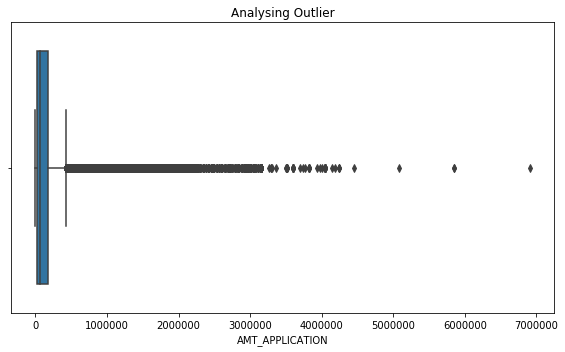

In [303]:
#checking the outlier
outliers(prev_inp,"AMT_APPLICATION")

##### Observation : <span style='background:yellow'> The outliers above 500,000 can be replaced with  **MEDIAN** as this is a continuous numerical variable</span>

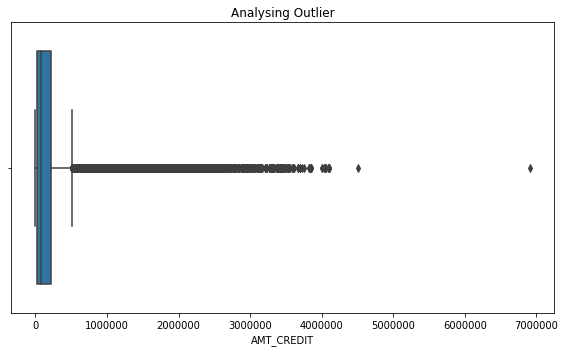

In [304]:
#checking the outlier
outliers(prev_inp,"AMT_CREDIT")

##### Observation : <span style='background:yellow'> The outliers above 500,000 can be replaced with  **MEDIAN** as this is a continuous numerical variable</span>

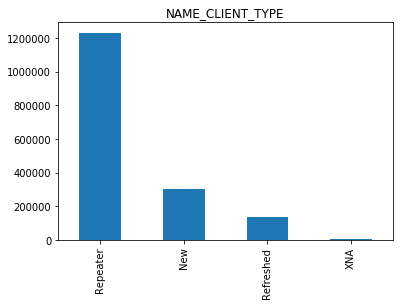

In [322]:
#Analysing the categorical variable
prev_inp.NAME_CLIENT_TYPE.value_counts().plot.bar()
plt.title("NAME_CLIENT_TYPE")
plt.show()

##### Observation : <span style='background:yellow'> The XNA are missing data and can be imputed with the MODE of the variable : "Repeater" - in this case </span>

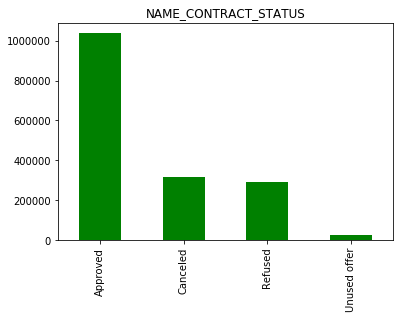

In [321]:
#Analysing the categorical variable
prev_inp.NAME_CONTRACT_STATUS.value_counts().plot.bar(color="green")
plt.title("NAME_CONTRACT_STATUS")
plt.show()

##### Observation : <span style='background:yellow'> All the categories are acceptable and none are missing. Hence we don't need to replace any value. </span>

## MERGING DATASETS

#### <span style =  'background:yellow'> Let's merge the 2 datasets now with important columns in place </span>

##### As the Original datasets are very large in size, let's take a subset of each with a few columns extracted for analysis as below - this would enable us to merge the datasets in a more efficient way

In [308]:
#Extract for Current Application dataset
imp_col = curr_inp[['SK_ID_CURR',
'TARGET',
'NAME_CONTRACT_TYPE',
'CODE_GENDER',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'AMT_ANNUITY',
'AMT_GOODS_PRICE',
'NAME_INCOME_TYPE',
'NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE',
'DAYS_BIRTH',
'DAYS_EMPLOYED',
'DAYS_REGISTRATION',
'DAYS_ID_PUBLISH',
'FLAG_MOBIL',
'FLAG_EMP_PHONE',
'FLAG_WORK_PHONE',
'FLAG_CONT_MOBILE',
'FLAG_PHONE',
'FLAG_EMAIL',
'OCCUPATION_TYPE',
'CNT_FAM_MEMBERS',
'ORGANIZATION_TYPE',
'REGION_RATING_CLIENT'
]]

In [309]:
#Extract for Previous Application dataset
prev_imp_col = prev_inp[['SK_ID_CURR', 
'NAME_CONTRACT_TYPE',
'AMT_ANNUITY', 
'AMT_APPLICATION',
'AMT_CREDIT',    
'AMT_GOODS_PRICE',
'NAME_CASH_LOAN_PURPOSE', 
'NAME_CONTRACT_STATUS',
'DAYS_DECISION',
'NAME_PAYMENT_TYPE',
'CODE_REJECT_REASON',
'NAME_CLIENT_TYPE',  
'NAME_GOODS_CATEGORY',
'NAME_PORTFOLIO',
'NAME_PRODUCT_TYPE',
'CHANNEL_TYPE',
'NAME_YIELD_GROUP',
'NFLAG_INSURED_ON_APPROVAL']]

In [310]:
#Checking shapes
print(imp_col.shape)
print(prev_imp_col.shape)

(307511, 29)
(1670214, 18)


### MERGE THE DATASETS

In [311]:
#Doing an inner join
merged_inp = pd.merge(left= imp_col, right=prev_imp_col, on = 'SK_ID_CURR', how = 'inner')

In [312]:
#Check shape of merged dataset
merged_inp.shape

(1413701, 46)

In [313]:
#Checking column info of merged dataset
merged_inp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 46 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SK_ID_CURR                 1413701 non-null  int64  
 1   TARGET                     1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x       1413701 non-null  object 
 3   CODE_GENDER                1413701 non-null  object 
 4   FLAG_OWN_CAR               1413701 non-null  object 
 5   FLAG_OWN_REALTY            1413701 non-null  object 
 6   CNT_CHILDREN               1413701 non-null  int64  
 7   AMT_INCOME_TOTAL           1413701 non-null  float64
 8   AMT_CREDIT_x               1413701 non-null  float64
 9   AMT_ANNUITY_x              1413608 non-null  float64
 10  AMT_GOODS_PRICE_x          1412493 non-null  float64
 11  NAME_INCOME_TYPE           1413701 non-null  object 
 12  NAME_EDUCATION_TYPE        1413701 non-null  object 
 13  NAME_FAMILY_

##### <span style= 'background: yellow'> Let us now divide the merged dataset into 2 separate datasets based on TARGET variable  </span>

In [314]:
#TARGET = 0 dataset
merged_df0 = merged_inp[merged_inp.TARGET==0]
#Checking the shape
merged_df0.shape

(1291341, 46)

In [315]:
#TARGET = 1 dataset
merged_df1 = merged_inp[merged_inp.TARGET==1]
#Checking the shape
merged_df1.shape

(122360, 46)

######  Let us now analyze the datasets w.r.t. the NAME_CONTRACT_STATUS

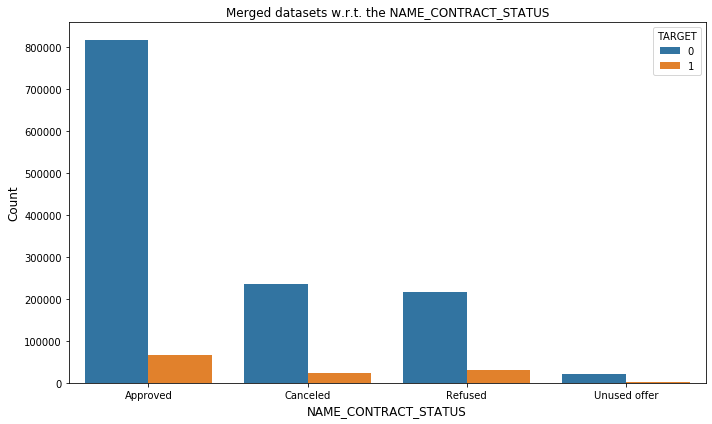

In [319]:
plt.figure(figsize=[10,6])
sns.countplot(data=merged_inp, x= "NAME_CONTRACT_STATUS", hue="TARGET")
plt.xlabel("NAME_CONTRACT_STATUS", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Merged datasets w.r.t. the NAME_CONTRACT_STATUS")
plt.tight_layout()
plt.show()

In [317]:
#checking the value counts of the merged dataset grouped on NAME_CONTRACT_STATUS
merged_inp.groupby("NAME_CONTRACT_STATUS").TARGET.value_counts(normalize=True)

NAME_CONTRACT_STATUS  TARGET
Approved              0         0.924113
                      1         0.075887
Canceled              0         0.908264
                      1         0.091736
Refused               0         0.880036
                      1         0.119964
Unused offer          0         0.917483
                      1         0.082517
Name: TARGET, dtype: float64

##### <span style= 'background: yellow'> We see from the above that the applications which were previously <span style= 'color: Blue'>  Canceled </span> or <span style= 'color: Blue'>Refused</span> have higher rate of defaulters.</span>

## Bivariate Analysis

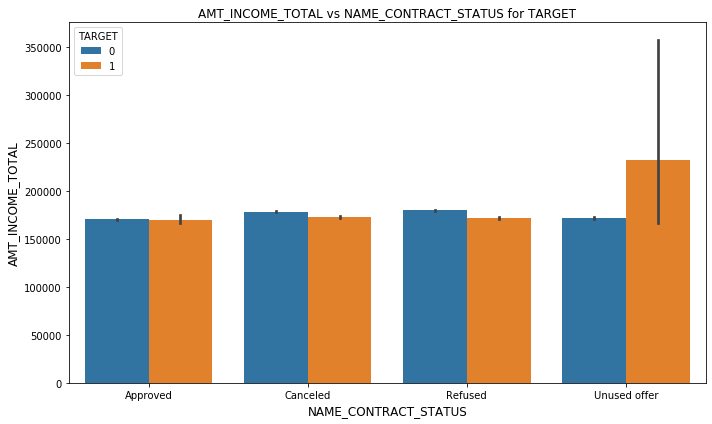

In [320]:
# AMT_INCOME_TOTAL vs NAME_CONTRACT_STATUS for TARGET 
plt.figure(figsize=[10,6])
sns.barplot(data=merged_inp, x= "NAME_CONTRACT_STATUS", y = "AMT_INCOME_TOTAL" , hue="TARGET")
plt.xlabel("NAME_CONTRACT_STATUS", fontsize=12)
plt.ylabel("AMT_INCOME_TOTAL", fontsize=12)
plt.title("AMT_INCOME_TOTAL vs NAME_CONTRACT_STATUS for TARGET")
plt.tight_layout()
plt.show()

##### <span style= 'background: yellow'> We note that Customers who Cancelled their previous application at a different stage than approval are at higher risk of becoming a defaulter for the current loan.